In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt

In [73]:
# Load and prepare the dataset
df = pd.read_csv("Zoo (3).csv")
X = df.drop(columns=['type']).astype(int)

In [75]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
# Parameters
k = 7
max_iters = 10
np.random.seed(42)

In [79]:
# Step 1: Initialize centroids randomly
initial_indices = np.random.choice(X_scaled.shape[0], k, replace=False)
centroids = X_scaled[initial_indices]

In [99]:
# Store cluster assignments for each iteration
all_labels = []

# Manual K-Means iteration loop
for i in range(max_iters):
    # Step 2: Assign points to nearest centroids
    labels = pairwise_distances_argmin(X_scaled, centroids)
    all_labels.append(labels)

    
    # Step 3: Count how many points are in each cluster
    print(f"\nIteration {i + 1}:")
    unique, counts = np.unique(labels, return_counts=True)
    for cluster_id in range(k):
        count = counts[unique.tolist().index(cluster_id)] if cluster_id in unique else 0
        print(f"  Cluster {cluster_id}: {count} points")

    # Step 4: Update centroids
    new_centroids = np.array([
        X_scaled[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
        for j in range(k)
    ])

    # Check for convergence
    if np.allclose(centroids, new_centroids):
        print("\nConverged.")
        break

    centroids = new_centroids  # This line should be properly indented



Iteration 1:
  Cluster 0: 24 points
  Cluster 1: 16 points
  Cluster 2: 22 points
  Cluster 3: 28 points
  Cluster 4: 0 points
  Cluster 5: 11 points
  Cluster 6: 0 points

Iteration 2:
  Cluster 0: 23 points
  Cluster 1: 7 points
  Cluster 2: 17 points
  Cluster 3: 5 points
  Cluster 4: 17 points
  Cluster 5: 19 points
  Cluster 6: 13 points

Iteration 3:
  Cluster 0: 21 points
  Cluster 1: 8 points
  Cluster 2: 16 points
  Cluster 3: 8 points
  Cluster 4: 17 points
  Cluster 5: 18 points
  Cluster 6: 13 points

Iteration 4:
  Cluster 0: 21 points
  Cluster 1: 8 points
  Cluster 2: 16 points
  Cluster 3: 7 points
  Cluster 4: 18 points
  Cluster 5: 18 points
  Cluster 6: 13 points

Iteration 5:
  Cluster 0: 21 points
  Cluster 1: 8 points
  Cluster 2: 16 points
  Cluster 3: 7 points
  Cluster 4: 18 points
  Cluster 5: 18 points
  Cluster 6: 13 points

Converged.


In [107]:

# Final cluster assignments
final_labels = all_labels[-1]
df['cluster'] = final_labels

In [111]:

# Final cluster distribution
final_counts = df['cluster'].value_counts().sort_index()# Print final cluster distribution
print("\nFinal Cluster Count Summary:")
for cluster_id in range(k):
    print(f"  Cluster {cluster_id}: {final_counts.get(cluster_id, 0)} points")


Final Cluster Count Summary:
  Cluster 0: 21 points
  Cluster 1: 8 points
  Cluster 2: 16 points
  Cluster 3: 7 points
  Cluster 4: 18 points
  Cluster 5: 18 points
  Cluster 6: 13 points


In [115]:
dataset_equal = np.array_equal(df.drop(columns=["type", "cluster"]).values, X_scaled)

# Print "Yes" or "No" based on the dataset comparison
print("\nIs the dataset equal to the predicted result? ", "Yes" if dataset_equal else "No")


Is the dataset equal to the predicted result?  No


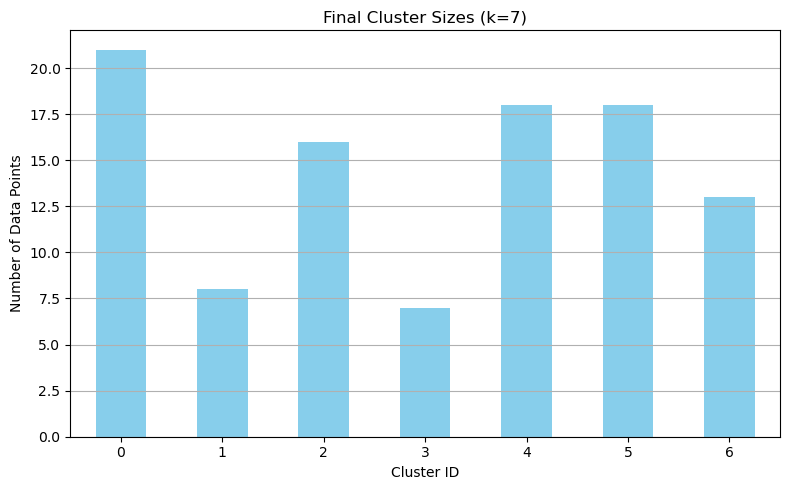

In [117]:
# Visualize final cluster distribution
plt.figure(figsize=(8, 5))
final_counts.plot(kind='bar', color='skyblue')
plt.title("Final Cluster Sizes (k=7)")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()